<div class="alert alert-block alert-success">
This jupyter notebook is part of the supplementary material for the book "Materials Data Science" (Stefan Sandfeld, Springer, 2024, DOI 10.1007/978-3-031-46565-9). For further details please refer to the accompanying webpage at <a href="https://mds-book.org">https://mds-book.org</a>.
</div>

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from utilities import pmfplot

## 10.3 Bernoulli Distribution
### Plot the discrete distribution 

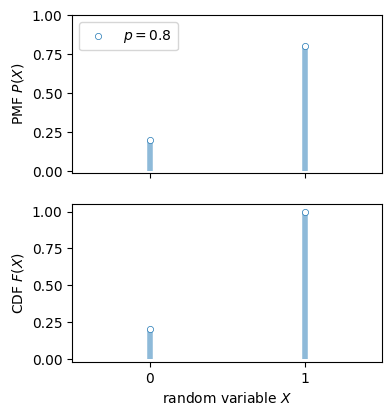

In [20]:
p = 0.8 
xlim = (-0.5, 1.5)
ylim = (-0.01, 1)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
x = np.arange(stats.bernoulli.ppf(0.0, p), stats.bernoulli.ppf(1., p)+1 )   
pmfplot(ax[0], x, stats.bernoulli.pmf(x, p), label=r'$p={}$'.format(p))
pmfplot(ax[1], x, stats.bernoulli.cdf(x, p))
    
ax[0].legend()
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", xlim=xlim, ylim=[-0.02, 1.05])    
ax[1].set_xticks([0, 1]);

### Draw samples from the Bernoulli Distribution
For this, we can use the Binomial distribution which is the more general distribution. 

In [21]:
rng = np.random.default_rng()

n_samples = 100
p = 0.8
sample = rng.binomial(n=1, p=p, size=n_samples)  # setting n=1 results in the Bernoulli distribution

Now show the distribution of these samples -- they roughly approximate the "true" distribution of the population shown above (which we indicate by the two dotted lines):

value 0 occurs 17 times
value 1 occurs 83 times


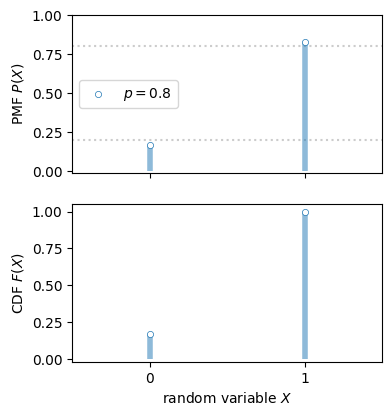

In [22]:
values = np.unique(sample)
counts = np.array([np.sum(sample == s) for s in values])

for v, c in zip(values, counts):
    print(f"value {v} occurs {c} times")

pmf = counts / counts.sum()
pdf = np.cumsum(pmf)


fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(4, 4.5))
pmfplot(ax[0], values, pmf, label=r'$p={}$'.format(p))
pmfplot(ax[1], values, pdf)    
ax[0].set(xlabel=r"", ylabel=r"PMF $P(X)$", xlim=xlim, ylim=ylim)
ax[1].set(xlabel=r"random variable $X$", ylabel=r"CDF $F(X)$", xlim=xlim, ylim=[-0.02, 1.05])    
ax[1].set_xticks([0, 1]);

ax[0].axhline(stats.bernoulli.pmf(0, p), c='0.8', ls=':')
ax[0].axhline(stats.bernoulli.pmf(1, p), c='0.8', ls=':')
ax[0].legend(loc=6)